# Problem Statement & Executive Summary

#### Obtain postings from 2 reddit threads ('The Truth is Here' (truth) and 'No Sleep' (nosleep)) using web scraping technique. The 2 groups are very different as in;

#### The truth thread is a collections of personal encounters with the unknown eg, non-fiction stories dealing with spirits, paranormal, strange happenings, and unexplained sightings while the nosleep thread is for authors to share their original horror stories.

#### The objective is to find out more about the attributes of the 2 threads and focus on the group that spend more time at Reddit and have a lot of followers ao that business has a higher conversion rate. Length of posts can be used as an indication of time spent online at Reddit. The longer the post the longer the time user spent at Reddit thus, higher chance of responding to advertisements.

#### Predictor is the 'selftext' and target is the 'subreddit'. Naive Bayes classifier will be used for the initial model to have a better feel of the data collected. Logistic Regression will be used with the aim to improve the initial model.

### Import data science libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import regex as re
import string
import time
import random
import seaborn as sns
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords # Import the stop word list
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

### Scrap a page to make sure the contents are what is required for building the models

In [2]:
# Define function to scrap data from url.
def getdata(url):
    res = requests.get(url, headers = {'User-agent': 'Pony Inc 1.0'})
    if res.status_code != 200:
        return print('Scraping unsccessful!')
    else:
        print('.')
        return res.json()

In [3]:
# Scrap the first 25 posts from the NoSleep thread at reddit. 
# A dot appeared means no error ie. response of 200
url = 'https://www.reddit.com/r/nosleep.json' # NoSleep thread
# Call function to scrap data
reddit_dict = getdata(url)

.


In [4]:
# Take a look at the scraped details
print(f'reddit_dict type: {type(reddit_dict)}')
print(f'\nreddit_dict len: {len(reddit_dict)}')
print(f'\nreddit_dict.keys: {reddit_dict.keys()}\n')
print(reddit_dict)

reddit_dict type: <class 'dict'>

reddit_dict len: 2

reddit_dict.keys: dict_keys(['kind', 'data'])

{'kind': 'Listing', 'data': {'modhash': '', 'dist': 27, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'nosleep', 'selftext': '', 'author_fullname': 't2_c446v4f', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'February 2020 contest nominations', 'link_flair_richtext': [], 'subreddit_name_prefixed': 'r/nosleep', 'hidden': False, 'pwls': 6, 'link_flair_css_class': None, 'downs': 0, 'hide_score': False, 'name': 't3_fdub8s', 'quarantine': False, 'link_flair_text_color': 'dark', 'author_flair_background_color': None, 'subreddit_type': 'public', 'ups': 90, 'total_awards_received': 1, 'media_embed': {}, 'author_flair_template_id': None, 'is_original_content': False, 'user_reports': [], 'secure_media': None, 'is_reddit_media_domain': False, 'is_meta': False, 'category': None, 'secure_media_embed': {}, 'link_flair_text': None, 'can_

In [5]:
# Check out what is reddit_dict['kind']
reddit_dict['kind']

'Listing'

In [6]:
# Take a look at the data
reddit_dict['data']

{'modhash': '',
 'dist': 27,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'nosleep',
    'selftext': '',
    'author_fullname': 't2_c446v4f',
    'saved': False,
    'mod_reason_title': None,
    'gilded': 0,
    'clicked': False,
    'title': 'February 2020 contest nominations',
    'link_flair_richtext': [],
    'subreddit_name_prefixed': 'r/nosleep',
    'hidden': False,
    'pwls': 6,
    'link_flair_css_class': None,
    'downs': 0,
    'hide_score': False,
    'name': 't3_fdub8s',
    'quarantine': False,
    'link_flair_text_color': 'dark',
    'author_flair_background_color': None,
    'subreddit_type': 'public',
    'ups': 90,
    'total_awards_received': 1,
    'media_embed': {},
    'author_flair_template_id': None,
    'is_original_content': False,
    'user_reports': [],
    'secure_media': None,
    'is_reddit_media_domain': False,
    'is_meta': False,
    'category': None,
    'secure_media_embed': {},
    'link_flair_text': None,
 

In [7]:
# Check out data | children contents
print('Length of [data][children] {}'.format(len(reddit_dict['data']['children'])))
print('To view individual post of [data][children], use [index]')
reddit_dict['data']['children']

Length of [data][children] 27
To view individual post of [data][children], use [index]


[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'nosleep',
   'selftext': '',
   'author_fullname': 't2_c446v4f',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'February 2020 contest nominations',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/nosleep',
   'hidden': False,
   'pwls': 6,
   'link_flair_css_class': None,
   'downs': 0,
   'hide_score': False,
   'name': 't3_fdub8s',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 90,
   'total_awards_received': 1,
   'media_embed': {},
   'author_flair_template_id': None,
   'is_original_content': False,
   'user_reports': [],
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text': None,
   'can_mod_post': False,
   'score': 90,
   'approved_by': None,
   'author

In [8]:
# Take a look at each of the dictionary values from reddit_dict [data] [children] [0]
# Check out what are the dictionary keys
print('reddit_dict[data].keys(): {}'.format(reddit_dict['data'].keys()))
print('The most important keys are "children" and "after"\n')

print('Details in the reddit_dict[data][children][0];')
print('..keys(): {}'.format(reddit_dict['data']['children'][0].keys()))
print('..[kind]: {}'.format(reddit_dict['data']['children'][0]['kind']))

# Important !!! This cell gives you the class label, aka your target.
print('..[subreddit]: {}'.format(reddit_dict['data']['children'][0]['data']['subreddit']))

print('..[title]: {}'.format(reddit_dict['data']['children'][0]['data']['title']))

reddit_dict['data']['children'][2]['data']['selftext']

# uncomment to view: reddit_dict['data']['children'][0]['data']

reddit_dict[data].keys(): dict_keys(['modhash', 'dist', 'children', 'after', 'before'])
The most important keys are "children" and "after"

Details in the reddit_dict[data][children][0];
..keys(): dict_keys(['kind', 'data'])
..[kind]: t3
..[subreddit]: nosleep
..[title]: February 2020 contest nominations


"I run a private campground.  Though it felt like I wouldn’t for much longer, considering [how badly things went last week](https://www.reddit.com/r/nosleep/comments/fe4qxm/how_to_survive_camping_the_man_with_the_skull_cup/).  At least the risks we took have given us some insight on the man with no shadow’s plan.  He intends to replace me with someone that, presumably, is easier to control.  What he wants to do with that influence I am not certain of, but you know what?  I don’t care.  I’m sure it won’t be anything good and I am not going to let him win.  (if you’re new here, you should really [start at the beginning](https://www.reddit.com/r/nosleep/comments/clp5h4/how_to_survive_camping/))\n\nThe old sheriff came up with a plan to kill the not-brother.  He sent it to me via text so that he wouldn’t be seen at my house too much and so he couldn’t be overheard on the phone.  He doesn’t trust hardly *anyone* right now, which I think is prudent.  This is one advantage we have over the ma

In [9]:
# Assign 25 posts to a variable
posts = [p['data'] for p in reddit_dict['data']['children']]

In [10]:
posts

[{'approved_at_utc': None,
  'subreddit': 'nosleep',
  'selftext': '',
  'author_fullname': 't2_c446v4f',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'February 2020 contest nominations',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/nosleep',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'downs': 0,
  'hide_score': False,
  'name': 't3_fdub8s',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 90,
  'total_awards_received': 1,
  'media_embed': {},
  'author_flair_template_id': None,
  'is_original_content': False,
  'user_reports': [],
  'secure_media': None,
  'is_reddit_media_domain': False,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_flair_text': None,
  'can_mod_post': False,
  'score': 90,
  'approved_by': None,
  'author_premium': False,
  'thumbnail': '',
  'edited': False,
  'au

In [11]:
# View 25 posts in pandas dataframe
pd.DataFrame(posts).head(5)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,link_flair_template_id
0,None,nosleep,,t2_c446v4f,False,None,0,False,February 2020 contest nominations,[],...,all_ads,True,https://redd.it/fduax3,13840907,1.583410e+09,0,None,False,NaN,NaN
1,None,nosleep,,t2_m297o,False,None,0,False,January 2020 Winners!,[],...,all_ads,True,https://redd.it/fectho,13840907,1.583498e+09,0,None,False,True,NaN
2,None,nosleep,I run a private campground. Though it felt li...,t2_3jjbxvfb,False,None,1,False,How to Survive Camping: blood forcibly taken,[],...,all_ads,False,https://www.reddit.com/r/nosleep/comments/fha5...,13840907,1.583984e+09,0,None,False,NaN,8beec82a-dcc1-11e8-a09f-0e09eae1a1c0
3,None,nosleep,"42 years, 6 months and 3 days ago, on the 5th ...",t2_20gz4yg3,False,None,0,False,42 years ago we sent Voyager 1 into space to l...,[],...,all_ads,False,https://www.reddit.com/r/nosleep/comments/fgwm...,13840907,1.583931e+09,5,None,False,NaN,NaN
4,None,nosleep,My cat is acting a bit… off. She’s a rescue so...,t2_2y34eooe,False,None,0,False,There’s something wrong with my cat,[],...,all_ads,False,https://www.reddit.com/r/nosleep/comments/fh8o...,13840907,1.583978e+09,0,None,False,NaN,NaN


In [12]:
# This is function is to test whether data can be saved as Pandas dataframe in CSV format for 
# NLP processing later. 
# Parameter for this function: convert_post_to_df(reddit_dict['data']['children'])
# File will be saved in 'posts.csv' in the same directory this Jupyter Notebook is residing.
# This function will not 'append' data to the file contents saved earlier oe, it will overwite
# the earlier contents each time it is call. This is for testing only
def convert_post_to_df(post):
    pd.DataFrame(post).to_csv('posts.csv', index = False)

# Save scraped data.
#*** convert_post_to_df(posts)

In [13]:
# Post IDs of the web page scraped
pd.DataFrame(posts)['name']

0     t3_fdub8s
1     t3_fecu80
2     t3_fha5qz
3     t3_fgwmy3
4     t3_fh8ovn
5     t3_fh4nc9
6     t3_fh9iqd
7     t3_fh858z
8     t3_fguqho
9     t3_fh8fge
10    t3_fgzz0j
11    t3_fhduqy
12    t3_fgxiok
13    t3_fhcvj4
14    t3_fh9aun
15    t3_fhcvgn
16    t3_fhaimk
17    t3_fhc04y
18    t3_fh4b5y
19    t3_fgyrs6
20    t3_fhdl2c
21    t3_fh7ijt
22    t3_fh9ag7
23    t3_fgwox8
24    t3_fh9doq
25    t3_fh7p7m
26    t3_fh3ek0
Name: name, dtype: object

In [14]:
# This value is important as it is the key to the next page of the posting.
reddit_dict['data']['after']

# Tag the value to the url like the commented statement below to move to the next 25
# postings on the next page; continue scraping as required. Alternatively, place the
# 2 statements below in a loop to automate the scraping process.

#*** url = url + '?after=' + reddit_dict['data']['after']
#*** reddit_dict = getdata(url)

't3_fh3ek0'

In [15]:
# Create a loop to scrap x number of posts. Each page contains 25 postings.
# Thus, if num_of_pg = 40, 1,000 posts will be scraped (40 x 25 = 1,000)
def scrap_data(url, num_of_pg = 40): # Default to 40 pages
    posts = [] # create an empty list
    num_of_posts = 0
    
# Set boolean to False as scraping the very first page should not have 'after' in the link
    after = None

        # Set filename according to the thread
    if 'nosleep' in url:
        filename = 'reddit_nosleep_posts_4_pages.csv'
    else:
        filename = 'reddit_truth_posts_4_pages.csv'
    
    # Start scraping loop
    for i in range(num_of_pg):
        if after == None: # If this is the first page of scraping, use url only
            current_url = url
        
        # otherwise, tag the variable 'after' which is the last posting ID on the previous page
        # to the url to move to the next page
        else: 
            current_url = url + '?after=' + after
        
        # print to have a visual check to make sure the loop is working ie, move to a new page
        print(current_url)
        
        # retrieve postings from the next page
        res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    # If response code is not 200 means there is an error accessing the webpage
        if res.status_code != 200:
            print('Status error', res.status_code)
            break
        # Assign json data to a dictionary
        current_dict = res.json()
        # Assign parsed data to variable 'current_posts'
        current_posts = [p['data'] for p in current_dict['data']['children']]
        posts.extend(current_posts) # append postings to list 'posts'
        
        # Nosleep's data is very different from The Truth is Here. As such,
        # Only features required for modeling will be saved in CSV file for NLP processing.
        # Name of the user id posted the post
        name = [p['data']['name'] for p in current_dict['data']['children']]
        # The label of the thread. This is the target ie, Y
        subreddit = [p['data']['subreddit'] for p in current_dict['data']['children']]
        # This is the post which will be used as the predictor to predict subreddit.
        selftext = [p['data']['selftext'] for p in current_dict['data']['children']]
        # Use this to filter out NSFW posts
        whitelist = [p['data']['whitelist_status'] for p in current_dict['data']['children']]
        # Title of the post. Will see how can this help in the data cleaning or modeling
        title = [p['data']['title'] for p in current_dict['data']['children']]
        
        selected_features = pd.DataFrame({'name': name, 'whitelist': whitelist, 'title': title, 'subreddit': subreddit, 'selftext': selftext})
        num_of_posts += len(current_posts) # Count the number of posts scraped

        # assign last posting id on the page to 'after' to be tagged to the 'url' to move to next pg
        after = current_dict['data']['after'] 
    
        if i > 0: # if i > 0, it means we are scraping from page 2 onwards of the thread
            # Save data scraped from page to file temporary
            pd.DataFrame(selected_features).to_csv(filename, mode='a', header=False, index = False)
        else: 
            pd.DataFrame(selected_features).to_csv(filename, index = False)
    
    # Generate a random sleep duration to look more 'natural' to avoid being kicked out
        sleep_duration = random.randint(2, 10)
        print(f'Pause for {sleep_duration} seconds before scraping {i + 1} of {num_of_pg}...')
        time.sleep(sleep_duration)

    # Inform user that scraping of 80 pages has completed and the data has been saved to a file
    print(f'\n{num_of_posts} postings saved in {filename} file.')

In [16]:
# Set up timer to keep track of time spent on scraping data
import time
_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

# To save time, the function scraps 4 pages for each thread and saved the results to csv files different from the 2 csv files used for modeling.

#### Reddit restrict scraping to 1,000 posts which translates to 40 pages (x 25 posts per page = 1,000 posts)

In [17]:
# url of NoSleep thread at reddit
tic()
url = 'https://www.reddit.com/r/nosleep.json'
# 40 pages yield 1,000 posts for the No Sleep thread which is the max number of posts allowed 
# by reddit to be scraped for each subreddit. 
scrap_data(url, 4)
tac()

#url of 'The truth is here' at reddit
tic()
url = 'https://www.reddit.com/r/Thetruthishere.json'
# 40 pages yield 1,000 posts for the 'The Truth is Here' thread.
scrap_data(url, 4)
tac()

https://www.reddit.com/r/nosleep.json
Pause for 9 seconds before scraping 1 of 4...
https://www.reddit.com/r/nosleep.json?after=t3_fh3ek0
Pause for 7 seconds before scraping 2 of 4...
https://www.reddit.com/r/nosleep.json?after=t3_fggj7r
Pause for 2 seconds before scraping 3 of 4...
https://www.reddit.com/r/nosleep.json?after=t3_fgrslh
Pause for 10 seconds before scraping 4 of 4...

102 postings saved in reddit_nosleep_posts_4_pages.csv file.
Time passed: 0hour:0min:37sec
https://www.reddit.com/r/Thetruthishere.json
Pause for 9 seconds before scraping 1 of 4...
https://www.reddit.com/r/Thetruthishere.json?after=t3_fgcpus
Pause for 7 seconds before scraping 2 of 4...
https://www.reddit.com/r/Thetruthishere.json?after=t3_fem41y
Pause for 8 seconds before scraping 3 of 4...
https://www.reddit.com/r/Thetruthishere.json?after=t3_fd9txp
Pause for 7 seconds before scraping 4 of 4...

100 postings saved in reddit_truth_posts_4_pages.csv file.
Time passed: 0hour:0min:38sec


### Read scraped data into pandas dataframe and perform EDA, data cleaning and NLP preprocessing

In [18]:
# Read scraped data
reddit_truth = pd.read_csv('reddit_truth_posts.csv')
reddit_nosleep = pd.read_csv('reddit_nosleep_posts.csv')

In [19]:
# Take a look at the df shape and samples
print(reddit_truth.shape)
reddit_truth.head()

(998, 5)


,name,whitelist,title,subreddit,selftext
0,t3_fgho9x,all_ads,I met my daughter from a miscarriage 3 years ago.,Thetruthishere,On mobile so I apologize for formatting and an...
1,t3_fglpap,all_ads,December Reddit Post About Wuhan Virus Dream,Thetruthishere,I wish to god that I'd screengrabbed it at the...
2,t3_fgmudo,all_ads,It followed.,Thetruthishere,When I was younger me and my friends enjoyed e...
3,t3_fgsfzi,all_ads,Advanced AI warning about the Industrial-milit...,Thetruthishere,NaN
4,t3_fg4wjo,all_ads,My Grandmother’s Story,Thetruthishere,"When my grandma was in her 20s, she was the so..."


In [20]:
# Take a look at the df shape and samples
print(reddit_nosleep.shape)
reddit_nosleep.head()

(992, 5)


,name,whitelist,title,subreddit,selftext
0,t3_fdub8s,all_ads,February 2020 contest nominations,nosleep,NaN
1,t3_fecu80,all_ads,January 2020 Winners!,nosleep,NaN
2,t3_fglo4e,all_ads,The Death Clock,nosleep,\nI first saw the clock as a child in the hall...
3,t3_fgox5y,all_ads,I started a new job as a overnight security gu...,nosleep,"Hello all, again thank you for the concerns, I..."
4,t3_fge70o,all_ads,Mother,nosleep,"""Eva? Have you fed the dogs yet?""\n\n\n""No, Mo..."


In [21]:
# Check how many unique subreddits do we have?
print('Number of unique posts for The Truth is Here is {} out of {} posts scraped'.format(reddit_truth['selftext'].nunique(), reddit_truth.shape[0]))
print('Number of unique posts for No Sleep is {} out of {} posts scraped'.format(reddit_nosleep['selftext'].nunique(), reddit_nosleep.shape[0]))

Number of unique posts for The Truth is Here is 933 out of 998 posts scraped
Number of unique posts for No Sleep is 788 out of 992 posts scraped


In [22]:
# Drop duplicates from The Truth is Here dataframe
reddit_truth = reddit_truth.drop_duplicates(subset=['selftext'], keep='last', inplace=False)
reddit_truth.reset_index(drop=True, inplace=True)
print(f'Truth dataframe structure after dropping duplicates: {reddit_truth.shape}')
reddit_truth.head()

Truth dataframe structure after dropping duplicates: (934, 5)


,name,whitelist,title,subreddit,selftext
0,t3_fgho9x,all_ads,I met my daughter from a miscarriage 3 years ago.,Thetruthishere,On mobile so I apologize for formatting and an...
1,t3_fglpap,all_ads,December Reddit Post About Wuhan Virus Dream,Thetruthishere,I wish to god that I'd screengrabbed it at the...
2,t3_fgmudo,all_ads,It followed.,Thetruthishere,When I was younger me and my friends enjoyed e...
3,t3_fg4wjo,all_ads,My Grandmother’s Story,Thetruthishere,"When my grandma was in her 20s, she was the so..."
4,t3_fgho8c,all_ads,Something is desperately trying to reach my mom,Thetruthishere,So I have a long story with lot of moving part...


In [23]:
# Drop duplicates from No Sleep
reddit_nosleep = reddit_nosleep.drop_duplicates(subset=['selftext'], keep='last', inplace=False)
reddit_nosleep.reset_index(drop=True, inplace=True)
print(f'No Sleep dataframe structure after dropping duplicates: {reddit_nosleep.shape}')
reddit_nosleep.head()

No Sleep dataframe structure after dropping duplicates: (789, 5)


,name,whitelist,title,subreddit,selftext
0,t3_fgngoi,promo_adult_nsfw,I Think I Took A Cursed Painting From My Frien...,nosleep,"\n\nThree weeks ago, one of my best friends, ..."
1,t3_ff2wd4,all_ads,"The Last Full Service Gas Station In Parrott, ...",nosleep,I had nowhere to go. I wasn’t in any particula...
2,t3_fexo2b,all_ads,I think I met my mother's doppelganger last night,nosleep,Last night was by far the most terrifying nigh...
3,t3_ff4cvp,all_ads,The Little Woman in Black,nosleep,"After two husbands and three children, I've go..."
4,t3_ffaz0a,all_ads,Dont knock on random doors,nosleep,"Hi, im currently hiding from that thing.\nAnd ..."


### Remove NSFW rows from truth dataframe

In [24]:
# See how many NSFW rows in 'truth' df
print(reddit_truth['whitelist'].value_counts())
reddit_truth[reddit_truth['whitelist'] == 'promo_adult_nsfw']

all_ads             932
promo_adult_nsfw      2
Name: whitelist, dtype: int64


,name,whitelist,title,subreddit,selftext
215,t3_f426vw,promo_adult_nsfw,Seen my dead grandmother watching TV.,Thetruthishere,My grandmother died 3 years ago. She really li...
808,t3_e23hye,promo_adult_nsfw,Dick worm,Thetruthishere,"It was a typical day at work, my bladder was f..."


In [25]:
# Remove nsfw from 'truth' df
reddit_truth = reddit_truth.drop(reddit_truth[reddit_truth['whitelist'] == 'promo_adult_nsfw'].index)
# Check to see any more nsfw rows in 'truth' df
reddit_truth['whitelist'].value_counts()

all_ads    932
Name: whitelist, dtype: int64

### Remove NSFW rows from nosleep dataframe

In [26]:
# See how many NSFW rows in 'nosleep' df
print(reddit_nosleep['whitelist'].value_counts())
reddit_nosleep[reddit_nosleep['whitelist'] == 'promo_adult_nsfw'].head()

all_ads             749
promo_adult_nsfw     40
Name: whitelist, dtype: int64


,name,whitelist,title,subreddit,selftext
0,t3_fgngoi,promo_adult_nsfw,I Think I Took A Cursed Painting From My Frien...,nosleep,"\n\nThree weeks ago, one of my best friends, ..."
29,t3_fern87,promo_adult_nsfw,There are screams constantly in my small town ...,nosleep,Eighteen months ago I started to stay up for f...
40,t3_feja1k,promo_adult_nsfw,Egg Shell,nosleep,Blue and cold. That was alway the first thing ...
56,t3_fep0ck,promo_adult_nsfw,I know what's coming.,nosleep,"In a way, it’s really soothing. The sound of r..."
62,t3_feml6w,promo_adult_nsfw,The Curse of Dark Mountain Final,nosleep,[Part 1](https://www.reddit.com/r/nosleep/comm...


In [27]:
# Remove nsfw from nosleep df
reddit_nosleep = reddit_nosleep.drop(reddit_nosleep[reddit_nosleep['whitelist'] == 'promo_adult_nsfw'].index)
# Check to see any more nsfw rows in 'truth' df
reddit_nosleep['whitelist'].value_counts()

all_ads    749
Name: whitelist, dtype: int64

In [28]:
# Increase the number of rows display
pd.set_option('display.max_rows', 1000)

### Remove columns that are not required for nlp. That is, retain subreddit as target and selftext as predictor for both dataframes

In [29]:
# Remove name, whitelist and title columns
reddit_truth = reddit_truth[['selftext', 'subreddit']]
reddit_nosleep = reddit_nosleep[['selftext', 'subreddit']]

# Relabel columns
reddit_truth.columns = ['post', 'thread']
reddit_nosleep.columns = ['post', 'thread']

reddit_truth.head()

,post,thread
0,On mobile so I apologize for formatting and an...,Thetruthishere
1,I wish to god that I'd screengrabbed it at the...,Thetruthishere
2,When I was younger me and my friends enjoyed e...,Thetruthishere
3,"When my grandma was in her 20s, she was the so...",Thetruthishere
4,So I have a long story with lot of moving part...,Thetruthishere


In [30]:
reddit_nosleep.head()

,post,thread
1,I had nowhere to go. I wasn’t in any particula...,nosleep
2,Last night was by far the most terrifying nigh...,nosleep
3,"After two husbands and three children, I've go...",nosleep
4,"Hi, im currently hiding from that thing.\nAnd ...",nosleep
5,My name is Erica Smyth and I was a podcaster. ...,nosleep


### Remove null values. 

In [31]:
# See how many null values
print(f'Number of null values in truth df: {reddit_truth.isnull().sum()}\n')
print(f'Number of null values in nosleep df: {reddit_nosleep.isnull().sum()}')

Number of null values in truth df: post      1
thread    0
dtype: int64

Number of null values in nosleep df: post      1
thread    0
dtype: int64


In [32]:
# Remove all null values for both dfs
reddit_truth.dropna(inplace=True)
reddit_nosleep.dropna(inplace=True)
print(reddit_truth.isnull().sum())
print(reddit_nosleep.isnull().sum())

post      0
thread    0
dtype: int64
post      0
thread    0
dtype: int64


In [33]:
# Reset index.
reddit_truth.reset_index(drop=True, inplace=True)
reddit_nosleep.reset_index(drop=True, inplace=True)

In [34]:
# Concat 2 dataframes into one by rows
reddit = reddit_truth.append(reddit_nosleep, ignore_index=True)
reddit

,post,thread
0,On mobile so I apologize for formatting and an...,Thetruthishere
1,I wish to god that I'd screengrabbed it at the...,Thetruthishere
2,When I was younger me and my friends enjoyed e...,Thetruthishere
3,"When my grandma was in her 20s, she was the so...",Thetruthishere
4,So I have a long story with lot of moving part...,Thetruthishere
...,...,...
1674,I’m not really into reading the scary stories ...,nosleep
1675,It was something like 5:00PM and i was doing m...,nosleep
1676,[If anyone receives this message please send h...,nosleep
1677,There is a romanticized version of Ireland as...,nosleep


In [35]:
# Check for unbalance classes and calculate the baseline using the target 'thread'
print(reddit['thread'].value_counts())

Thetruthishere    931
nosleep           748
Name: thread, dtype: int64


##### Stratification will be used as it is quite inbalance between The Truth is Here and No Sleep.

In [36]:
# A quick look at the sumamry of the dataframe details before proceeding to nlp preprocessing
def eda(dataframe):
    print ("missing values \n", dataframe.isnull().sum())
    print ("\ndataframe index \n", dataframe.index)
    print ("\ndataframe types \n", dataframe.dtypes)
    print ("\ndataframe describe \n", dataframe.describe())
    print('\n')
    for item in dataframe:
        print (item)
        print (dataframe[item].nunique())

eda(reddit)

missing values 
 post      0
thread    0
dtype: int64

dataframe index 
 RangeIndex(start=0, stop=1679, step=1)

dataframe types 
 post      object
thread    object
dtype: object

dataframe describe 
                                                      post          thread
count                                                1679            1679
unique                                               1678               2
top     When I was younger me and my friends enjoyed e...  Thetruthishere
freq                                                    2             931


post
1678
thread
2


#### Let's dig deeper into the 2 threads to better understand the difference between the 2 group of users

In [37]:
# Here is a quick summary of the 2 threads
reddit.groupby('thread').describe()

post         \
               count unique   
thread                        
Thetruthishere   931    931   
nosleep          748    748   

                                                                        
                                                              top freq  
thread                                                                  
Thetruthishere  \n“A 13 year old boy was killed this past Tues...    1  
nosleep           \n\nit was Monday, and my parents were leavi...    1

In [38]:
# Calculate the length of each post to see how active the threads
reddit['length'] = reddit['post'].apply(len)
reddit.head()

,post,thread,length
0,On mobile so I apologize for formatting and an...,Thetruthishere,2299
1,I wish to god that I'd screengrabbed it at the...,Thetruthishere,942
2,When I was younger me and my friends enjoyed e...,Thetruthishere,4167
3,"When my grandma was in her 20s, she was the so...",Thetruthishere,1387
4,So I have a long story with lot of moving part...,Thetruthishere,5112


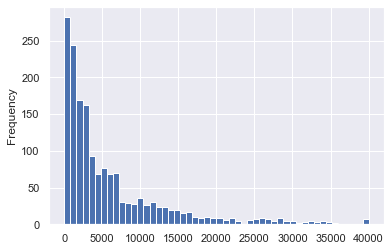

In [39]:
# Plot to see the distribution of the length of posts
reddit['length'].plot(bins=50,kind = 'hist')

#### Indeed, there is a big gap in the length of posts. Majority of the posts has character length of up to 2k. There is an outlier with length of 40k. Let's take a look at the post and see which thread it belongs to.

In [40]:
reddit['length'].describe()

count     1679.000000
mean      6093.126861
std       7371.184531
min         22.000000
25%       1209.000000
50%       3113.000000
75%       7884.000000
max      40010.000000
Name: length, dtype: float64

In [41]:
# Retrieve the longest post
reddit[reddit['length'] > 40000]['post'].iloc[0]

'“Alright, guys, we will take a short break now and begin our hike once everyone is ready. Toilet is down the hall, last door on your right” I said after Lavinia, Toby, and Mimi walked into the family cabin after me. Toby took in his surrounding and nodded in approval while Lavinia rushed to the toilet, she was probably holding in her pee for the past hour. I dropped my hand carry next to the black faux leather couch before sitting down, trying to relax a little after driving for the past 2 hours.\n\nToby and Mimi spent some time exploring the cabin, looking at pictures of previous family gatherings in the cabin while remarking how goofy I looked when I was young. I laughed in response to their teasing. Lavinia returned from the toilet shortly after, volunteered to show them around, clearly still remembering her way around the place from her trip here 2 months ago to meet my family. I took the opportunity to double check the contents of my hiking bag, making sure I have everything we n

Text(0.5, 0, 'Length of Posts in Chars')

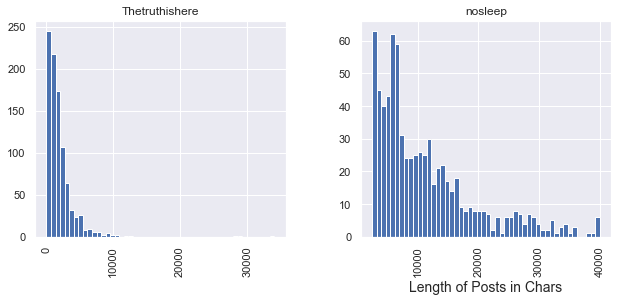

In [42]:
# Let's see which thread 'talk the most'.
reddit.hist(column='length',by ='thread', bins=50,figsize = (10,4))
plt.xlabel('Length of Posts in Chars', fontsize=14)

#### From the graphs above, we can see that nosleep users are really passionate about their topics and the average length of their posts are longer than that of the truth group. The longest post belongs to the nosleep group. 

In [43]:
# Make a copy of the dataframe.
reddit_copy = reddit.copy()
#reddit = reddit_copy.copy()

In [44]:
reddit

,post,thread,length
0,On mobile so I apologize for formatting and an...,Thetruthishere,2299
1,I wish to god that I'd screengrabbed it at the...,Thetruthishere,942
2,When I was younger me and my friends enjoyed e...,Thetruthishere,4167
3,"When my grandma was in her 20s, she was the so...",Thetruthishere,1387
4,So I have a long story with lot of moving part...,Thetruthishere,5112
...,...,...,...
1674,I’m not really into reading the scary stories ...,nosleep,5588
1675,It was something like 5:00PM and i was doing m...,nosleep,3427
1676,[If anyone receives this message please send h...,nosleep,18011
1677,There is a romanticized version of Ireland as...,nosleep,6960


### Write a function to convert a raw posts to remove html, puntuation, lower case, etc

In [45]:
def posts_to_words(raw_post):   
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_post).get_text()
    
    # 2. Remove non-letters.
    text = re.sub("[^a-zA-Z]", " ", review_text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    letters_only = re.sub('\w*\d\w*', '', text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]  

    # 6. Instantiate lemmatizer.
    lemmatizer = WordNetLemmatizer()

    # 7. Lemmatize tokens.
    tokens_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return(" ".join(tokens_lem))

clean_text = lambda x: posts_to_words(x)

In [46]:
 # Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Let's take a look at the updated text
reddit['post'] = pd.DataFrame(reddit['post'].apply(clean_text))

In [48]:
reddit

,post,thread,length
0,mobile apologize formatting error little bit d...,Thetruthishere,2299
1,wish god screengrabbed time anyone else rememb...,Thetruthishere,942
2,younger friend enjoyed exploring abandoned hou...,Thetruthishere,4167
3,grandma sole survivor small plane crash husban...,Thetruthishere,1387
4,long story lot moving part bear think tell sto...,Thetruthishere,5112
...,...,...,...
1674,really reading scary story reddit mainly use m...,nosleep,5588
1675,something like pm math homework bedroom kept g...,nosleep,3427
1676,anyone receives message please send help http ...,nosleep,18011
1677,romanticized version ireland beautiful emerald...,nosleep,6960


### Let's use Naive Bayes classifier to predict whether a post was from 'The Truth is Here' or 'No Sleep' thread.

#### 1. Engineer a feature to turn `thread` into a 1 or 0 column, where 1 indicates `The Truth is Here`.

In [49]:
# Convert categorical values in the thread column to 0's and 1's. 
# 1 being The truth is here and 0 being nosleep
reddit['thread'] = [1 if reddit.loc[i,'thread'] == 'Thetruthishere' 
                    else 0 for i in range(reddit.shape[0])]
reddit

,post,thread,length
0,mobile apologize formatting error little bit d...,1,2299
1,wish god screengrabbed time anyone else rememb...,1,942
2,younger friend enjoyed exploring abandoned hou...,1,4167
3,grandma sole survivor small plane crash husban...,1,1387
4,long story lot moving part bear think tell sto...,1,5112
...,...,...,...
1674,really reading scary story reddit mainly use m...,0,5588
1675,something like pm math homework bedroom kept g...,0,3427
1676,anyone receives message please send help http ...,0,18011
1677,romanticized version ireland beautiful emerald...,0,6960


In [50]:
# Function to plot Wordcloud
def plot_wordcloud(words):
#comment_words = ' '
    comment_words = ' '
    sw = set(STOPWORDS) 

    # iterate through the csv file 
    for val in words: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
          
        for words in tokens: 
            comment_words = comment_words + words + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          stopwords = sw, 
                          min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show() 

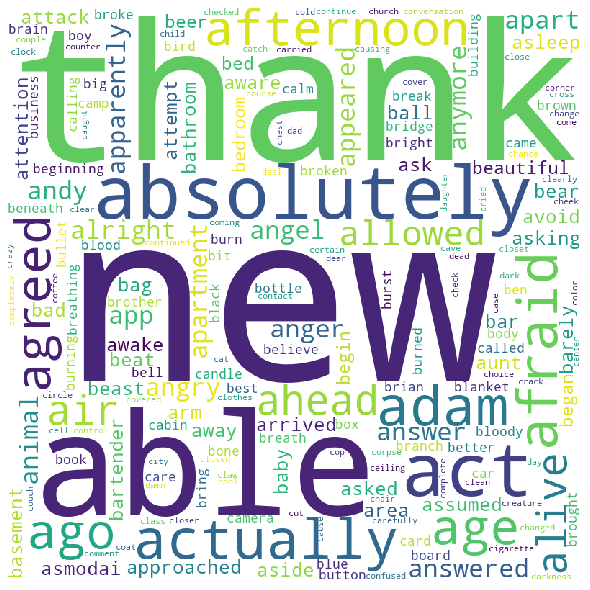

In [51]:
# Instantiate CountVectorizer.
# max_features was set to 1,000
cvec = CountVectorizer(max_features = 1000, stop_words = 'english')

# Fit CountVectorizer on the training data to transform training data.
cvec_reddit_nosleep = pd.DataFrame(cvec.fit_transform(reddit.query('thread == 0')['post']).todense(),
                          columns = cvec.get_feature_names())

# Generate word cloud for Nosleep
plot_wordcloud(cvec_reddit_nosleep)

### Word cloud for No Sleep Thread

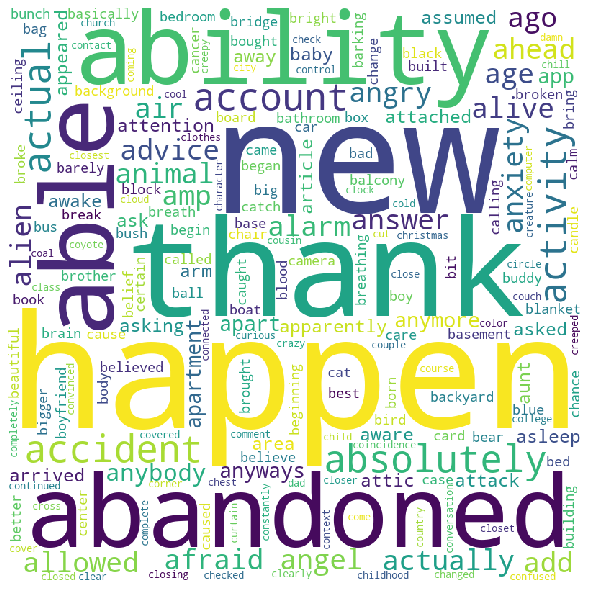

In [52]:
# Instantiate CountVectorizer.
# max_features was set to 1,000
cvec = CountVectorizer(max_features = 1000, stop_words = 'english')

# Fit CountVectorizer on the training data to transform training data.
cvec_reddit_truth = pd.DataFrame(cvec.fit_transform(reddit.query('thread == 1')['post']).todense(),
                          columns = cvec.get_feature_names())

# Generate Wordcloud for The Truth is Here
plot_wordcloud(cvec_reddit_truth)

### Word cloud for The Truth is Here Group
### Words like new, thank, able and absolutely are common words between the No sleep thread and the Truth is Here. Words like accident, happen and abandoned appearing very often in the The Truth is Here thread is expected due to the nature of the thread.

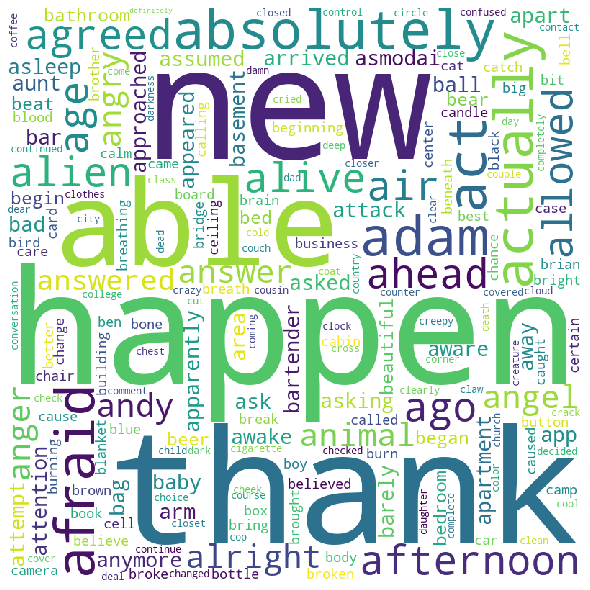

In [53]:
# Instantiate CountVectorizer.
# max_features was set to 1,000
cvec = CountVectorizer(max_features = 1000, stop_words = 'english')

# Fit CountVectorizer on the training data to transform training data.
cvec_reddit = pd.DataFrame(cvec.fit_transform(reddit['post']).todense(),
                          columns = cvec.get_feature_names())

# Generate wordcloud for both thread combined
plot_wordcloud(cvec_reddit)

### Word Cloud for Combined Threads - No Sleep and The Truth is Here. Nothing out of the ordinary.

#### Stratification will be used when train test split the data to counter the inbalance between the 2 threads

In [54]:
# Check for unbalanced classes. Recall, 1 is The Truth is Here and 0 is No Sleep
reddit['thread'].value_counts()

1    931
0    748
Name: thread, dtype: int64

#### 2. Split data into X and y

In [55]:
X = reddit[['post']]
y = reddit[['thread']]

#### 3. Split data into training and testing sets.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### 4. Turn text into features. [Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [57]:
# Instantiate CountVectorizer.
# max_features was set to 5,000 for first run.
cvec = CountVectorizer(max_features = 1000, stop_words = 'english', ngram_range=(1,2))

In [58]:
# Fit CountVectorizer on the training data to transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['post']).todense(),
                          columns = cvec.get_feature_names())

In [59]:
# Transform testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(X_test['post']).todense(),
                         columns = cvec.get_feature_names())

In [60]:
X_train_cvec.head()

,able,absolutely,act,actually,afraid,afternoon,age,ago,agreed,ahead,...,xei,yard,yeah,year,year ago,year old,yelled,yellow,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,2


## Before fitting the Multinomial Naive Bayes model, calculate the baseline score

In [61]:
print('\nBaseline score: \n{}'.format(reddit['thread'].value_counts(normalize=True)))
print('\nBaseline accuracy: ', round(reddit['thread'].value_counts(normalize=True)[1],2))


Baseline score: 
1    0.554497
0    0.445503
Name: thread, dtype: float64

Baseline accuracy:  0.55


#### 5. Fit a Naive Bayes model!

<details><summary> Multinomial Naive Bayes model should be used for this dataset. Expand to see reason why.</summary>
    
- The columns of X are all integer counts, so MultinomialNB is the best choice here.
- BernoulliNB is best when we have 0/1 counts in all columns of X. (a.k.a. dummy variables)
- GaussianNB is best when the columns of X are Normally distributed. (Practically, though, it gets used whenever BernoulliNB and MultinomialNB are inappropriate.)
</details>

In [62]:
# Import MultinomialNB from sklearn.
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # Instantiate the model

Although priors can be set, but let's use the default and allow `sklearn` to estimate priors from the training data directly.

In [63]:
# Fit the MultinomialNB model with y_train converted to 1d array.
model = nb.fit(X_train_cvec, y_train.values.ravel())

In [64]:
# Generate predictions
predictions = model.predict(X_test_cvec)

Evaluate model's performance using one of the followings.
In this case, it doesn't really matter wrongly classifying No Sleep post as The Truth is Here and vice versa. Since there is no specific order to the test result ie, false positive or false negatives hence, accuracy is a better choice.

- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Sensitivity = TP / (TP + FN)
- Specificity = TN / (TN + FP)
- Precision = TP / (TP + FP)
- AUC ROC

In [65]:
# Check out the Score of the model used on the training set.
model.score(X_train_cvec, y_train)

0.9213661636219221

In [66]:
# Let's see how the model perform on the testing set.
model.score(X_test_cvec, y_test)

0.919047619047619

#### The MNB score is much better than the baseline score of 0.55 (The Truth is Here) calculated above.


#### Other than using the score to compare amongst model, there are other metrics available to measure how good a model is. Let's take a look at the confusion matrix. We will calculate the accuracy using the confusion matrix.

In [67]:
# Import the confusion matrix function.
from sklearn.metrics import confusion_matrix

In [68]:
# Generate a confusion matrix to view metrics
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("\nTrue Negatives: %s" % tn)
print("False Positives: %s (Predicted positive but turned out to be negative)" % fp)
print("False Negatives: %s (Predicted negative but turned out to be positive)" % fn)
print("True Positives: %s" % tp)

[[166  21]
 [ 13 220]]

True Negatives: 166
False Positives: 21 (Predicted positive but turned out to be negative)
False Negatives: 13 (Predicted negative but turned out to be positive)
True Positives: 220


In [69]:
# Accuracy = (TP + TN)/ (TP + TN + FP + FN)
accuracy_mnb = (tp + tn)/ (tp + tn + fp + fn)
print(f'The accuracy of the MultinomialNB Confusion Matrix is {accuracy_mnb}.')

The accuracy of the MultinomialNB Confusion Matrix is 0.919047619047619.


#### Expand to see what does the confusion matrix mean. 

<details><summary> By default, what does a true negative mean here? </summary>

- True negatives are things correctly predict to be negative.
- In this case, since The Truth is Here = 1, a true negative means the model correctly predicted the post is from the No Sleep thread.
</details>

---

<details><summary> By default, what does a false positive mean here? </summary>

- False positives are things falsely predict to be positive.
- In this case, since The Truth is Here = 1, a false positive means the model incorrectly predicted the post is a The Truth is Here post (when it was really a No Sleep post).
</details>

### Let's use CountVectorizer with Naive Bayes Multinomial model

In [70]:
# instantiate another cvec with English stop_words
cvec_stop = CountVectorizer(stop_words = 'english')

In [71]:
# Take a look at the reddit dataframe again
print(reddit.shape)
reddit.head()

(1679, 3)


,post,thread,length
0,mobile apologize formatting error little bit d...,1,2299
1,wish god screengrabbed time anyone else rememb...,1,942
2,younger friend enjoyed exploring abandoned hou...,1,4167
3,grandma sole survivor small plane crash husban...,1,1387
4,long story lot moving part bear think tell sto...,1,5112


In [72]:
# Assign predictors to X1 and target to y1
X1 = reddit.post
y1 = reddit.thread

In [73]:
y1 = y1.values

In [74]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify=y, random_state=42)

Start by instantiating a naive cvec first and fit the data to get a sense of it, before tuning the hyperparameters via GridSearchCV

In [75]:
cvec_naive = CountVectorizer()

X_train_cvec_naive = cvec_naive.fit_transform(X_train).todense()
X_train_cvec_naive_df = pd.DataFrame(X_train_cvec_naive, columns = cvec_naive.get_feature_names())

In [76]:
X_train_cvec_naive_df.shape

(1259, 25622)

In [77]:
# instantiate another cvec but with English stop_words
cvec_stop = CountVectorizer(stop_words = 'english')

In [78]:
# Fit the model
X_train_cvec_stop = cvec_stop.fit_transform(X_train).todense()
X_train_cvec_stop_df = pd.DataFrame(X_train_cvec_stop, columns = cvec_stop.get_feature_names())
X_train_cvec_stop_df.shape

(1259, 25418)

In [79]:
# With 'stop-words', features reduced by 305
X_train_cvec_naive_df.shape[1] - X_train_cvec_stop_df.shape[1]

204

#### Inclusion of English stopwords eliminated a further 300+ features.

### EDA of X_train_cvec_stop features:

In [80]:
# find out how many times each word appear in the corpus by creating a 'Total' row at the end of the dataframe:
X_train_cvec_stop_df.loc['Total',:]= X_train_cvec_stop_df.sum(axis=0)
X_train_cvec_stop_df.loc['Total',:].sort_values(ascending=False)

like            5567.0
time            4109.0
know            3159.0
said            2987.0
eye             2778.0
                 ...  
ejaculation        1.0
ej                 1.0
patchers           1.0
einstein           1.0
zzzzzzzzzzzz       1.0
Name: Total, Length: 25418, dtype: float64

#### Create a DataFrame for the above Total Word Count, and then check, for each specified frequency (2, 10, 50, etc), what is the associated number of features (words) that appear in the corpus.

In [81]:
Xtrain_total_CVEC_stop = pd.DataFrame(X_train_cvec_stop_df.loc['Total',:].sort_values(ascending=False))
Xtrain_total_CVEC_stop.head()

,Total
like,5567.0
time,4109.0
know,3159.0
said,2987.0
eye,2778.0


In [82]:
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 2]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 10]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 50]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 100]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 200]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 500]))
print(len(Xtrain_total_CVEC_stop.loc[Xtrain_total_CVEC_stop['Total'] <= 1000]))

12411
19547
23531
24409
24916
25238
25356


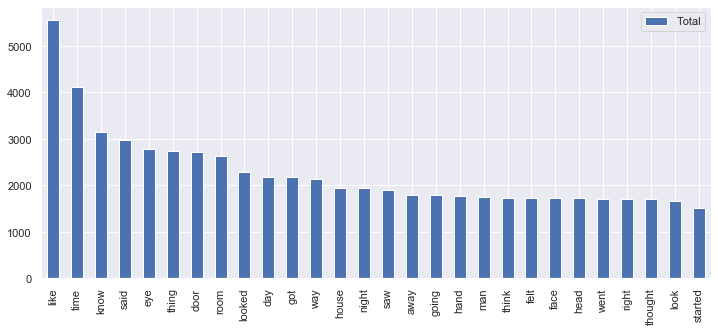

In [83]:
# plot histogram to observe the distribution
Xtrain_total_CVEC_stop[Xtrain_total_CVEC_stop.Total > 1500].plot(kind='bar', figsize=(12,5));

In [84]:
len(Xtrain_total_CVEC_stop[Xtrain_total_CVEC_stop.Total > 1500])

28

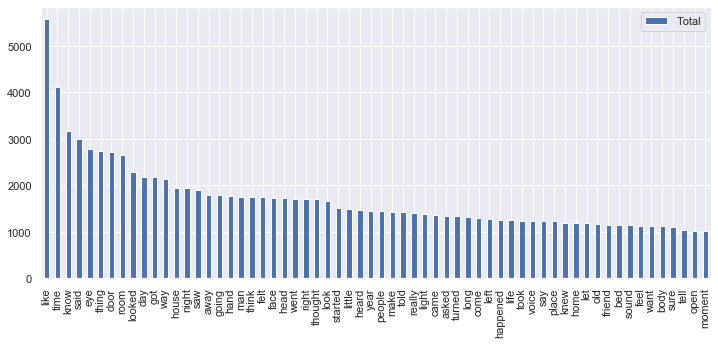

In [85]:
# plot histogram to observe the distribution
Xtrain_total_CVEC_stop[Xtrain_total_CVEC_stop.Total > 1000].plot(kind='bar', figsize=(12,5));

In [86]:
len(Xtrain_total_CVEC_stop[Xtrain_total_CVEC_stop.Total > 1000])

62

#### From the plot, looks like users use words like, 'like' and 'just' a lot. Let's run a GridSearchCV and tune the hyperparameters accordingly to optimize the model.

In [87]:
# Setup pipeline to run Logistic Regression multiple steps at one-go 
pipe = Pipeline([
    ("cvec", CountVectorizer(stop_words = 'english')),
    ("lr", LogisticRegression())
    ])

In [88]:
# Setup pipline parameters
pipe_params = {
    'cvec__max_features': [20, 30, 50],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs = -1)
tic()
gs.fit(X_train, y_train)
tac()

Time passed: 0hour:0min:23sec


In [89]:
print(gs.best_score_)
gs.best_params_

0.8800635424940428


{'cvec__max_df': 0.25, 'cvec__max_features': 50, 'cvec__min_df': 2}

In [90]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9062748212867355
0.9142857142857143


#### Score looks good and it is better than the baseline score of 0.55. However, the Naive Bayes Multinomial model score is still better at 0.919.  Let's tune the hyperparamters to see if a better score can be achieved.

In [91]:
pipe_params = {
    'cvec__max_features': [80, 150, 200],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .5, .8],
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs = -1)
tic()
gs.fit(X_train, y_train)
tac()

Time passed: 0hour:0min:19sec


In [92]:
print(gs.best_score_)
gs.best_params_

0.90945194598888


{'cvec__max_df': 0.25, 'cvec__max_features': 200, 'cvec__min_df': 2}

In [93]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9912629070691025
0.9214285714285714


#### Model seems to be quite optimized. This set of hyperparameters is better than the previous set. We will use this new set of hyperparameters on the test data.

In [94]:
# We'll set max_features to 50.
cvec_optim = CountVectorizer(stop_words = 'english', max_df = 0.25, max_features = 50, min_df = 2)
X_test_cvec = cvec_optim.fit_transform(X_test).todense()

In [95]:
# Fit the Logistic Regression model and get the score for the test dataset
lr = LogisticRegression()
lr.fit(X_test_cvec, y_test)
lr.score(X_test_cvec, y_test)

0.9642857142857143

The score looks okay. Let's see how the confusion matrix fair.

In [96]:
# Fit the LogReg model with y_train converted to 1d array.
lrmodel = lr.fit(X_test_cvec, y_test)
# Generate predictions
predictions = lrmodel.predict(X_test_cvec)

In [97]:
# Generate a confusion matrix.
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("\nTrue Negatives: %s" % tn)
print("False Positives: %s (Predicted positive but turned out to be negative)" % fp)
print("False Negatives: %s (Predicted negative but turned out to be positive)" % fn)
print("True Positives: %s" % tp)
# Accuracy = (TP + TN)/ (TP + TN + FP + FN)
accuracy_lr = (tp + tn)/ (tp + tn + fp + fn)
print(f'\nThe accuracy of Logistic Regression Confusion Matrix is {accuracy_lr}')
print(f'The accuracy of MultinomialNB Confusion Matrix is {accuracy_mnb}')

[[173  14]
 [  1 232]]

True Negatives: 173
False Positives: 14 (Predicted positive but turned out to be negative)
False Negatives: 1 (Predicted negative but turned out to be positive)
True Positives: 232

The accuracy of Logistic Regression Confusion Matrix is 0.9642857142857143
The accuracy of MultinomialNB Confusion Matrix is 0.919047619047619


### Evaluation of the Naive Bayes MultiNomial and Logistic Regresison models.
#### The Logistic Regression model accuracy score of 0.964 which is better than the MultinomialNB score of 0.919. In addition, the Logistic Regression confusion matrix computed above is better than the MNB confusion matrix from accuracy perspective ie, increased accuracy in predicting TN, TP, FN and FP. Therefore, Logistic Regression will be deployed.

#### Confusion Matrix from the Naive Bayes Multinomial model:
[ 166 | 21 ]<br />
[ 13  | 210 ]

True Negatives: 166<br />
False Positives: 21 (Predicted positive but turned out to be negative)<br />
False Negatives: 13 (Predicted negative but turned out to be positive)<br />
True Positives: 210

## Conclusion and Recommendation

### Always try to get data directly from source or use API or RestAPI to retrieve data from backend database first. Only use scraping when there is no other choices as it is very slow, requires a lot of efforts in extracting data from web pages and risk of IP address being blocked by target website.

### Data scraped from Reddit has a lot of duplicated postings and contains advertisments that may be offensive to some (eg, NSFW). Reddit limiting scraping to 1,000 posts for each subreddit plus removing of duplicates, null and offensive adverts post a severe limitation on modeling (insufficient data). 

### Naive Bayes Multinomial classifer is suitable for this type of task ie, classifying binary outputbut other models with hyperparameters tuning capabilities such as Logistic Regression, KNN, Tf/ Idf can build more accurate models. In this particular case, Logistic Regression's model produces a more accurate results in classifying posts in the respective thread.

### Recommendation:
### Durng the EDA phase, the fact that there are more NSFW in the No Sleep thread than the Truth thread shows that either the Truth thread is actively blocking ads or other companies is getting results from the No Sleep thread. Therefore, placing ads in the No Sleep thread makes more sense and more bang for the buck too. 

### It will be good if more data can be obtained to do topic modeling to segment No sleep group users by topics. This way, specific advertisements can be targeted to the respective topical group. Business can approach Reddit for posting pop-up advertisements based on the contents posted by the users. For eg, business can place advertisements such as computer games, online games to users posting fantasy related stories. For user group posting horror stories, business can advertise on-demand movies subscription or novel that are horror genre.

### If reddit's system has adaptive capabiliy, business can consider using the feature for eg, analytics can be perfomed and pop-up advertisement promoting products and services that are related to the contents can be activated while the user is still typing. 

### As for the Truth group, business may want to offer products and services such as councelling service, yoga lessons, supplements with calming effects, etc. to help users that may be trying to get over their traumatic experience. 

### To measure how successful the advertisements for each group, Reddit can provide click rate for each group so that business can measure the performance of the advertisements.
